In [3]:

import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
feature_names = ["First Term Gpa", "Second Term Gpa", "First Language", "Funding numeric", "School numeric", 
                 "FastTrack numeric","Coop numeric","Residency numeric","Gender numeric","Previous Education",
                 "Age Group","High School Average Mark","Math Score","English Grade","FirstYearPersistence"]

In [182]:

import os

file_name = os.path.join(".", "Student data.csv")

students_dataset = pd.read_csv(file_name, names=feature_names, na_values = ["?"], skiprows=24)
     

In [6]:
students_dataset

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,NaN,4,6,2,2,2,2,1.0,1.0,NaN,47.0,10.0,0
1433,4.360000,4.074074,1.0,2,6,1,1,1,1,2.0,4.0,NaN,NaN,10.0,1
1434,2.020833,2.450000,1.0,2,6,2,1,1,2,1.0,1.0,78.0,18.0,9.0,1
1435,4.021739,4.357143,NaN,4,6,2,1,2,1,1.0,2.0,NaN,46.0,8.0,1


In [276]:
X = students_dataset.copy()

In [277]:
y = X.pop('FirstYearPersistence')
y = y[:, np.newaxis]

C:\Users\phili\AppData\Local\Temp\ipykernel_21472\795413588.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [9]:
X.head(5)

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0


In [39]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [48]:
students_dataset["FirstYearPersistence"].value_counts()

1    1138
0     299
Name: FirstYearPersistence, dtype: int64

In [319]:
# Separate majority and minority classes
df_majority = students_dataset[students_dataset["FirstYearPersistence"]==1]     # 1   
df_minority = students_dataset[students_dataset["FirstYearPersistence"]==0]     # 0   

In [54]:
df_majority.shape

(1138, 15)

In [53]:
df_minority.shape

(299, 15)

In [324]:
from sklearn.utils import resample

# Upsample minority class 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled["FirstYearPersistence"].value_counts())
# =============================================================================
# 0    14563
# 1    14563
# =============================================================================


1    1138
0    1138
Name: FirstYearPersistence, dtype: int64


In [155]:
from sklearn.utils import resample

# Upsample minority class 
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_minority),    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(df_downsampled["FirstYearPersistence"].value_counts())
# =============================================================================
# 0    299
# 1    299
# =============================================================================


df_upsampled = df_downsampled


1    299
0    299
Name: FirstYearPersistence, dtype: int64


In [325]:

y = df_upsampled["FirstYearPersistence"];
X = df_upsampled.drop("FirstYearPersistence", axis=1, errors='ignore')

In [326]:
X = df_upsampled.copy()

In [327]:
y = X.pop('FirstYearPersistence')
y = y[:, np.newaxis]

C:\Users\phili\AppData\Local\Temp\ipykernel_21472\795413588.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [143]:
X

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
1422,4.000000,4.333333,1.0,8,6,2,2,1,2,1.0,5.0,74.0,16.0,9.0
1080,4.239130,4.357143,NaN,4,6,2,1,2,1,1.0,3.0,NaN,50.0,8.0
1428,3.675000,3.500000,1.0,2,6,1,2,1,1,2.0,3.0,96.0,NaN,9.0
1377,2.600000,2.619048,3.0,4,6,1,2,2,1,2.0,3.0,NaN,NaN,10.0
1303,2.000000,1.909091,1.0,2,6,2,1,1,2,1.0,1.0,70.0,38.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2.522727,0.000000,1.0,2,6,2,2,1,2,1.0,6.0,72.0,39.0,9.0
1416,0.391304,NaN,1.0,8,6,2,2,1,1,0.0,7.0,69.0,33.0,9.0
1423,0.652174,NaN,1.0,2,6,2,2,1,2,1.0,2.0,78.0,31.0,7.0
1426,1.315789,0.000000,1.0,2,6,2,1,1,2,1.0,3.0,64.0,28.0,9.0


In [250]:
cat_features = ["Funding numeric", "School numeric", "FastTrack numeric", "Coop numeric", "Residency numeric", "Gender numeric"]

In [328]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



features_pipeline = Pipeline([
    
    ('imputer', SimpleImputer(strategy="mean", missing_values=np.nan)),
    
    ('std_scaler', StandardScaler()),
])

In [252]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#cat_pipeline = Pipeline(
#    steps=[("ord", OrdinalEncoder())]
#)

cat_pipeline = Pipeline(
    steps=[("hot", OneHotEncoder())]
)

transformer_cat = ColumnTransformer(
     transformers=[
         ("cat", cat_pipeline, cat_features)
     ], remainder='passthrough'
)


features_pipeline = Pipeline([
    ('cat_ord', transformer_cat),
    ('imputer', SimpleImputer(strategy="mean", missing_values=np.nan)),
    
    ('std_scaler', StandardScaler()),
])

In [329]:
features_pipeline.fit_transform(X)

array([[-1.79866208e+00, -2.34073562e+00, -8.31847533e-01, ...,
        -1.85190954e+00, -1.64313571e+00, -5.75860475e-01],
       [ 5.97206068e-02, -5.18946679e-01,  1.28414298e+00, ...,
         0.00000000e+00,  0.00000000e+00, -5.75860475e-01],
       [ 1.36058848e+00,  1.23277353e+00, -8.31847533e-01, ...,
         1.80263126e+00,  1.11997727e+00,  6.12942399e-01],
       ...,
       [ 1.17475022e+00,  1.37874983e+00, -8.31847533e-01, ...,
         2.13486224e+00,  0.00000000e+00,  6.12942399e-01],
       [-1.05530900e+00, -9.39359091e-01, -8.31847533e-01, ...,
        -1.18744758e+00, -1.31156215e+00, -5.75860475e-01],
       [-1.79866208e+00, -4.04518405e-16, -8.31847533e-01, ...,
         0.00000000e+00,  8.98928229e-01, -2.35906479e+00]])

In [263]:
X_transormed = pd.DataFrame(features_pipeline.transform(X))
X_transormed.columns = students_dataset.columns[:-1]
X_transormed.index = students_dataset.index

In [330]:
X_transormed = pd.DataFrame(features_pipeline.transform(X))
X_transormed.columns = df_upsampled.columns[:-1]
X_transormed.index = df_upsampled.index

In [264]:
X_transormed = pd.DataFrame(features_pipeline.transform(X))

In [164]:
X_transormed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.180681,1.628903e+00,-0.819245,4.636713,0.0,0.506263,0.677153,-0.664051,0.469571,-0.369213,1.703322,-5.974983e-02,-1.600724e+00,0.573492
1,1.355442,1.650080e+00,0.000000,1.140175,0.0,0.506263,-1.476770,1.505908,-2.083189,-0.369213,0.313188,1.460945e-15,2.254800e+00,-0.008106
2,0.943164,8.877315e-01,-0.819245,-0.608094,0.0,-1.975257,0.677153,-0.664051,-2.083189,1.380152,0.313188,2.201957e+00,4.028698e-16,0.573492
3,0.157531,1.042068e-01,1.292172,1.140175,0.0,-1.975257,0.677153,1.505908,-2.083189,1.380152,0.313188,1.460945e-15,4.028698e-16,1.155091
4,-0.280961,-5.272338e-01,-0.819245,-0.608094,0.0,0.506263,-1.476770,-0.664051,0.469571,-0.369213,-1.076946,-4.709692e-01,8.940269e-01,0.573492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.101059,-2.225192e+00,-0.819245,-0.608094,0.0,0.506263,0.677153,-0.664051,0.469571,-0.369213,2.398389,-2.653595e-01,1.007425e+00,0.573492
594,-1.456630,3.949760e-16,-0.819245,4.636713,0.0,0.506263,0.677153,-0.664051,-2.083189,-2.118578,3.093456,-5.737741e-01,3.270381e-01,0.573492
595,-1.265981,3.949760e-16,-0.819245,-0.608094,0.0,0.506263,0.677153,-0.664051,0.469571,-0.369213,-0.381879,3.514696e-01,1.002426e-01,-0.589704
596,-0.780997,-2.225192e+00,-0.819245,-0.608094,0.0,0.506263,-1.476770,-0.664051,0.469571,-0.369213,0.313188,-1.087798e+00,-2.399507e-01,0.573492


In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transormed, y, test_size=0.17, random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [235]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))


In [189]:
import tensorflow as tf

In [308]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [309]:

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
     

In [310]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
     

In [336]:
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
48/48 [==============================] - 0s 4ms/step - loss: 0.7375 - accuracy: 0.6486 - val_loss: 0.6193 - val_accuracy: 0.7090
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6850 - val_loss: 0.5508 - val_accuracy: 0.7302
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.7042 - val_loss: 0.5219 - val_accuracy: 0.7460
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7234 - val_loss: 0.5066 - val_accuracy: 0.7566
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7379 - val_loss: 0.4984 - val_accuracy: 0.7804
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7379 - val_loss: 0.4935 - val_accuracy: 0.7831
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7426 - val_loss: 0.4894 - val_accuracy: 0.7804
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7836 - val_loss: 0.4622 - val_accuracy: 0.7831
Epoch 60/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7743 - val_loss: 0.4611 - val_accuracy: 0.7857
Epoch 61/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7756 - val_loss: 0.4610 - val_accuracy: 0.7857
Epoch 62/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7862 - val_loss: 0.4614 - val_accuracy: 0.7857
Epoch 63/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7882 - val_loss: 0.4613 - val_accuracy: 0.7831
Epoch 64/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7882 - val_loss: 0.4615 - val_accuracy: 0.7831
Epoch 65/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7902 - val_loss: 0.4604 - val_accuracy: 0.7884
Epoch 

(0.0, 1.0)

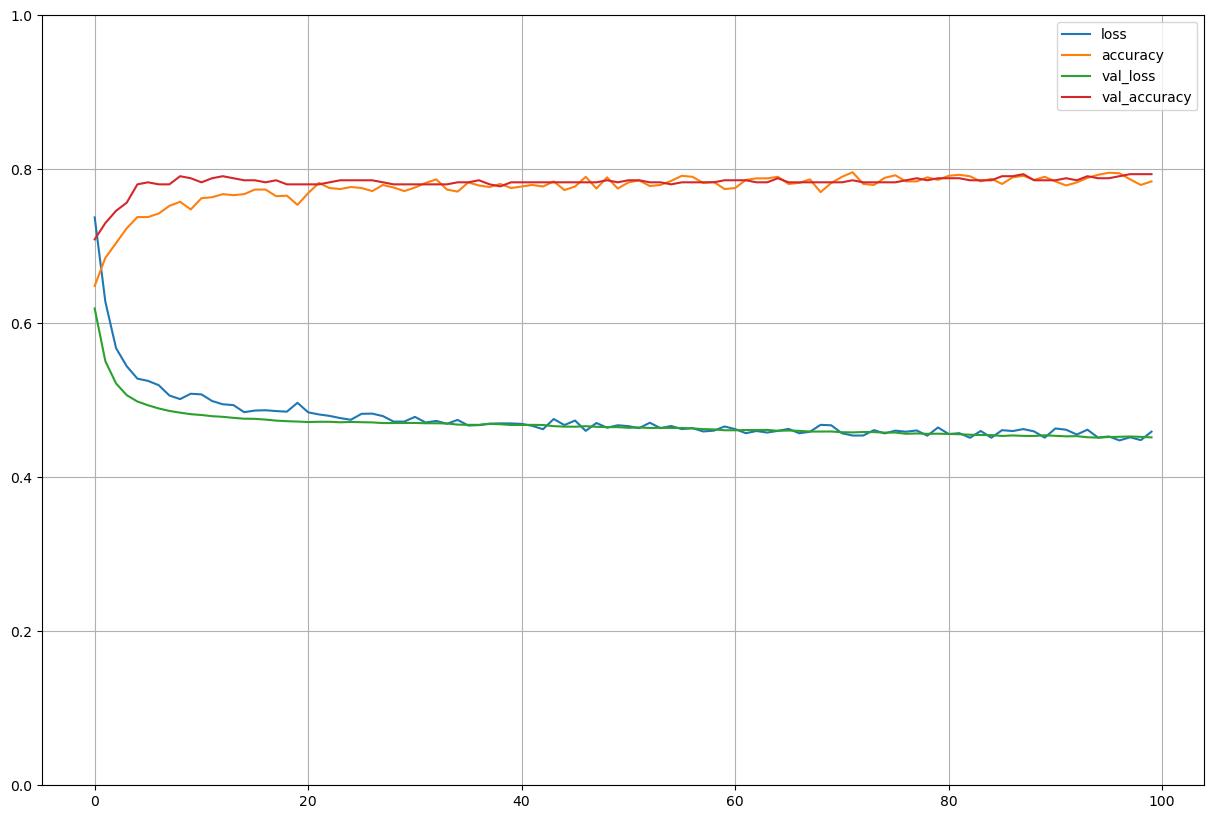

In [337]:
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [21]:
score = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8472


In [22]:
import keras_tuner
from tensorflow import keras

In [213]:
def build_model(hp):
  num_layers = hp.Int("num_layers", 1, 10)
  dropout = hp.Boolean("dropout")
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  model = keras.Sequential()

  #model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    
  for i in range(num_layers):
    model.add(
        keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=5, max_value=200, step=10),
            activation=hp.Choice(f"activation_{i}", ["relu", "tanh"]),
        )
    )

  #if dropout:
    #model.add(keras.layers.Dropout(rate=0.25))

  model.add(keras.layers.Dense(1, activation="sigmoid"))

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
  )

  return model
     

In [214]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_result",
    project_name="group_project",
)
     

In [215]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}


In [216]:
tuner.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
     

Trial 100 Complete [00h 00m 08s]
val_accuracy: 0.8472222089767456

Best val_accuracy So Far: 0.8611111342906952
Total elapsed time: 00h 13m 32s
INFO:tensorflow:Oracle triggered exit


In [217]:
tuner.results_summary()


Results summary
Results in keras_tuner_result\group_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
dropout: True
lr: 0.001096082336813933
units_0: 165
activation_0: tanh
units_1: 5
activation_1: relu
units_2: 35
activation_2: tanh
units_3: 115
activation_3: tanh
units_4: 195
activation_4: tanh
units_5: 35
activation_5: tanh
units_6: 165
activation_6: relu
units_7: 185
activation_7: relu
units_8: 75
activation_8: tanh
Score: 0.8611111342906952
Trial summary
Hyperparameters:
num_layers: 2
dropout: True
lr: 0.0018761421496988281
units_0: 85
activation_0: tanh
units_1: 65
activation_1: relu
units_2: 145
activation_2: tanh
units_3: 75
activation_3: tanh
units_4: 45
activation_4: tanh
units_5: 45
activation_5: tanh
units_6: 65
activation_6: tanh
units_7: 105
activation_7: relu
units_8: 115
activation_8: relu
Score: 0.859375
Trial summary
Hyperparameters:
num_layers: 5
dropout: True
lr: 0.005140535765580687
units_0: 35
activation_0: relu
units_1: 25
activation_1: 

In [237]:
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])



In [238]:

# Fit with the entire dataset.
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))

history = model.fit(x=x_all, y=y_all, epochs=100)


Epoch 1/100
57/57 [==============================] - 1s 1ms/step - loss: 0.5834 - accuracy: 0.7231
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7802
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7896
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7929
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7973
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8049
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8060
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8082
Epoch 9/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8088
Epoch 10/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8110
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9093
Epoch 84/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.9060
Epoch 85/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2200 - accuracy: 0.9137
Epoch 86/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9055
Epoch 87/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9071
Epoch 88/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9099
Epoch 89/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9170
Epoch 90/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9148
Epoch 91/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.9115
Epoch 92/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9110
Epoch 93/100


In [338]:

history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
48/48 [==============================] - 0s 4ms/step - loss: 0.4475 - accuracy: 0.7915 - val_loss: 0.4514 - val_accuracy: 0.7884
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.7803 - val_loss: 0.4511 - val_accuracy: 0.7857
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7922 - val_loss: 0.4509 - val_accuracy: 0.7910
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7895 - val_loss: 0.4511 - val_accuracy: 0.7884
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.7909 - val_loss: 0.4507 - val_accuracy: 0.7910
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7902 - val_loss: 0.4508 - val_accuracy: 0.7910
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7909 - val_loss: 0.4506 - val_accuracy: 0.7910
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8015 - val_loss: 0.4391 - val_accuracy: 0.7937
Epoch 60/100
48/48 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.7882 - val_loss: 0.4388 - val_accuracy: 0.7937
Epoch 61/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7988 - val_loss: 0.4385 - val_accuracy: 0.7937
Epoch 62/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.7876 - val_loss: 0.4381 - val_accuracy: 0.7937
Epoch 63/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.7909 - val_loss: 0.4385 - val_accuracy: 0.7937
Epoch 64/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.7856 - val_loss: 0.4372 - val_accuracy: 0.7937
Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.7981 - val_loss: 0.4379 - val_accuracy: 0.7910
Epoch 

In [220]:
score = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8403


(0.0, 1.0)

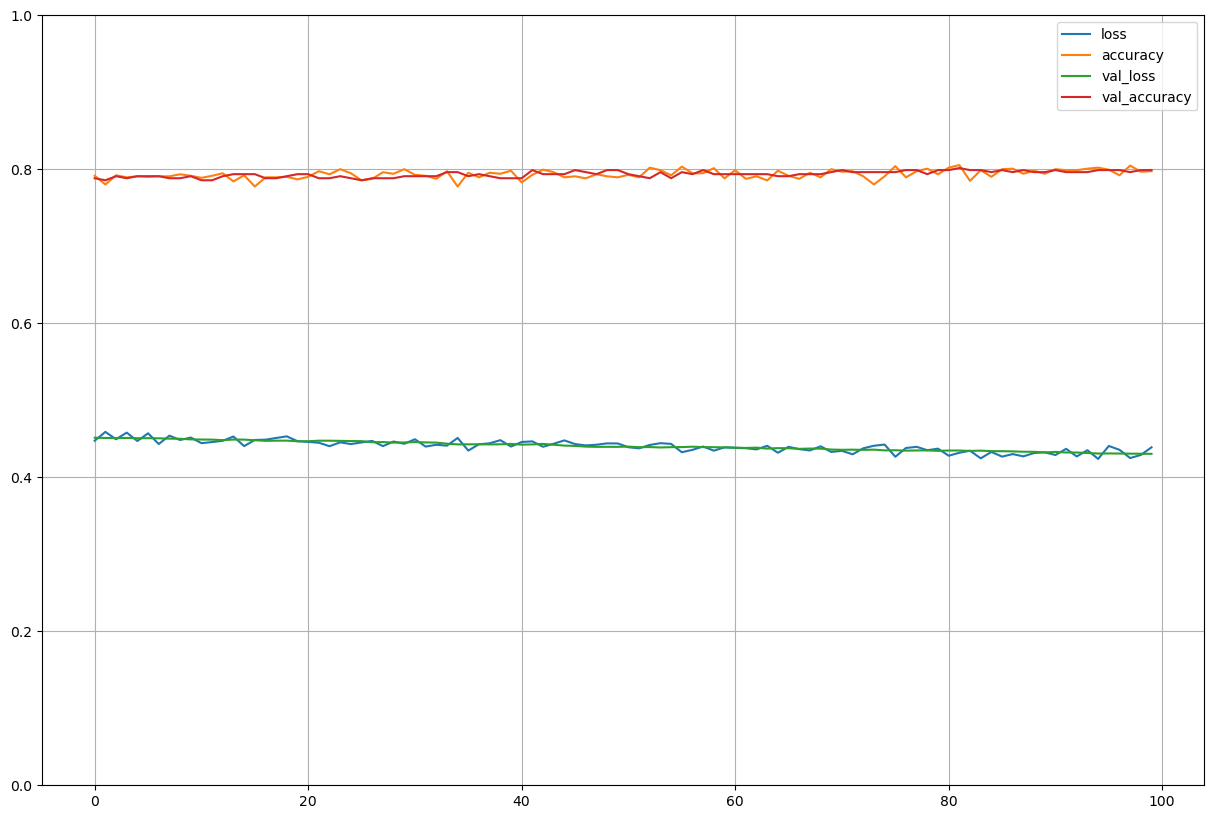

In [339]:
pd.DataFrame(history.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

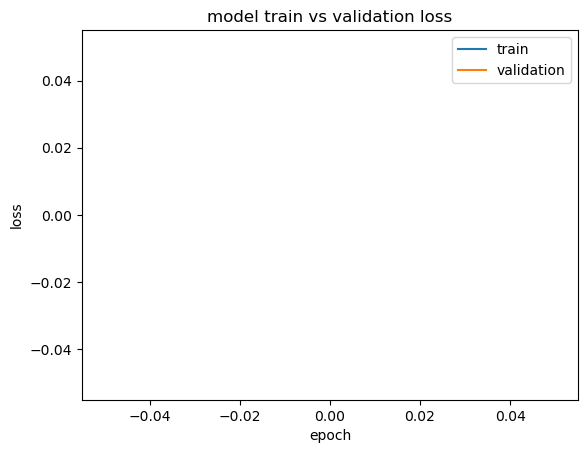

In [34]:
from matplotlib import pyplot
# plot train and validation loss
pyplot.plot(history.history['loss'][500:])
pyplot.plot(history.history['val_loss'][500:])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [241]:
def build_model2(hp):
  num_layers = hp.Int("num_layers", 1, 10)
  dropout = hp.Boolean("dropout")
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    
  for i in range(num_layers):
    model.add(
        keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=5, max_value=200, step=10),
            activation=hp.Choice(f"activation_{i}", ["relu", "tanh"]),
        )
    )

  #if dropout:
    #model.add(keras.layers.Dropout(rate=0.25))

  model.add(keras.layers.Dense(1, activation="sigmoid"))

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
  )

  return model
     

In [242]:
tuner2 = keras_tuner.RandomSearch(
    hypermodel=build_model2,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_result",
    project_name="group_project",
)
     

In [243]:
tuner2.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Trial 100 Complete [00h 00m 12s]
val_accuracy: 0.842857152223587

Best val_accuracy So Far: 0.898901104927063
Total elapsed time: 00h 21m 22s
INFO:tensorflow:Oracle triggered exit


In [244]:
tuner2.results_summary()

Results summary
Results in keras_tuner_result\group_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
dropout: True
lr: 0.00030726550633355346
units_0: 125
activation_0: relu
units_1: 135
activation_1: tanh
units_2: 185
activation_2: relu
units_3: 115
activation_3: relu
units_4: 115
activation_4: tanh
units_5: 35
activation_5: tanh
units_6: 45
activation_6: relu
units_7: 25
activation_7: relu
units_8: 195
activation_8: tanh
units_9: 135
activation_9: relu
Score: 0.898901104927063
Trial summary
Hyperparameters:
num_layers: 3
dropout: True
lr: 0.0038288011315976145
units_0: 185
activation_0: tanh
units_1: 185
activation_1: tanh
units_2: 135
activation_2: relu
units_3: 175
activation_3: tanh
units_4: 165
activation_4: relu
units_5: 165
activation_5: relu
units_6: 95
activation_6: tanh
units_7: 15
activation_7: relu
units_8: 65
activation_8: tanh
units_9: 175
activation_9: relu
Score: 0.894505500793457
Trial summary
Hyperparameters:
num_layers: 3
dropout: False
lr

In [267]:
best_hps2 = tuner2.get_best_hyperparameters(5)
model2 = build_model(best_hps2[0])


In [340]:

history2 = model2.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
48/48 [==============================] - 1s 8ms/step - loss: 0.7109 - accuracy: 0.8134 - val_loss: 0.3537 - val_accuracy: 0.8624
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.8809 - val_loss: 0.2431 - val_accuracy: 0.9127
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.2101 - accuracy: 0.9193 - val_loss: 0.2221 - val_accuracy: 0.9127
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9404 - val_loss: 0.2015 - val_accuracy: 0.9339
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9523 - val_loss: 0.1956 - val_accuracy: 0.9286
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 0.9543 - val_loss: 0.1770 - val_accuracy: 0.9524
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.9590 - val_loss: 0.1924 - val_accuracy: 0.9233
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9967 - val_loss: 0.2213 - val_accuracy: 0.9656
Epoch 60/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.2207 - val_accuracy: 0.9630
Epoch 61/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.2279 - val_accuracy: 0.9630
Epoch 62/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.2070 - val_accuracy: 0.9683
Epoch 63/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9974 - val_loss: 0.2253 - val_accuracy: 0.9683
Epoch 64/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.2479 - val_accuracy: 0.9577
Epoch 65/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9960 - val_loss: 0.2681 - val_accuracy: 0.9497
Epoch 

(0.0, 1.0)

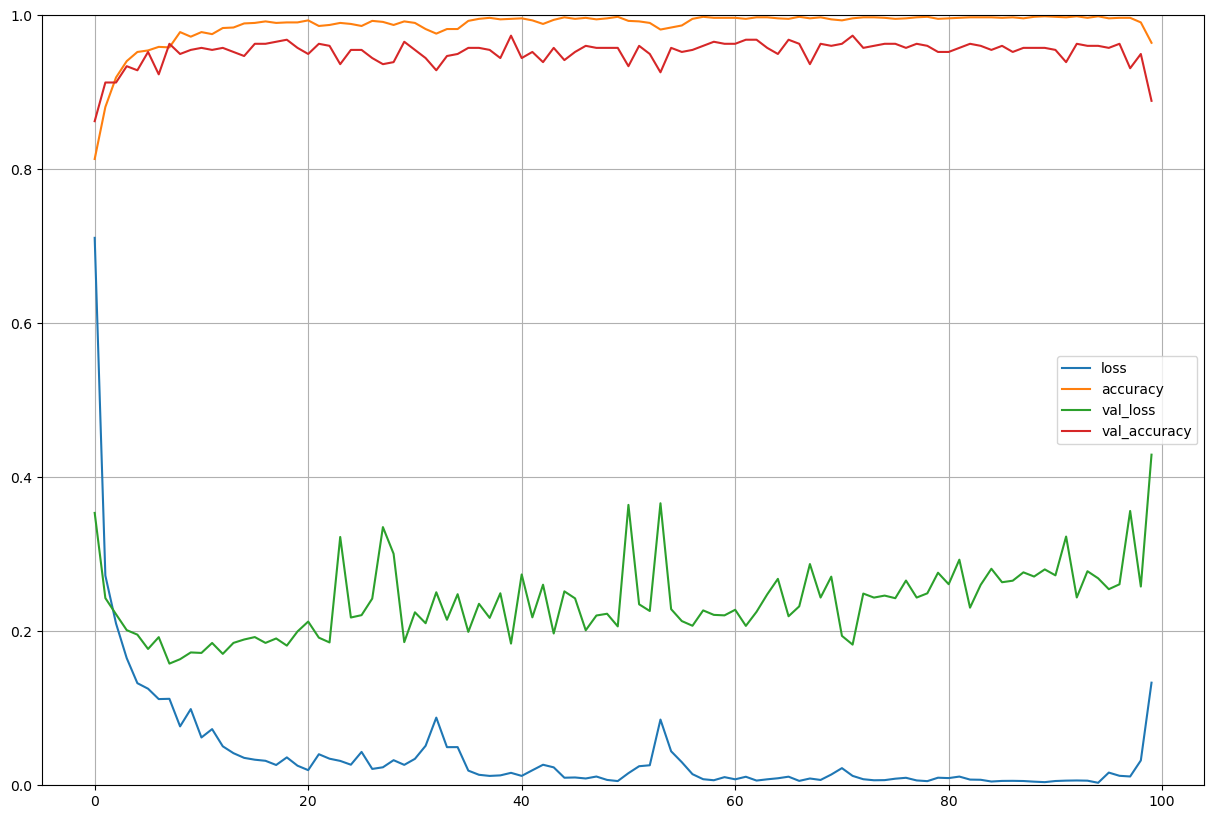

In [341]:
pd.DataFrame(history2.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [313]:
def build_model3(hp):
  num_layers = hp.Int("num_layers", 1, 10)
  dropout = hp.Boolean("dropout")
  dropout_rate = hp.Float("dr", min_value=0.1, max_value=0.5)  
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  model = keras.Sequential()

  #model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    
  for i in range(num_layers):
    model.add(
        keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=5, max_value=200, step=10),
            activation=hp.Choice(f"activation_{i}", ["relu", "tanh"]),
        )
    )

  if dropout:
    model.add(keras.layers.Dropout(rate=dropout_rate))

  model.add(keras.layers.Dense(1, activation="sigmoid"))

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
  )

  return model
     

In [314]:
tuner3 = keras_tuner.RandomSearch(
    hypermodel=build_model3,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_result",
    project_name="group_project",
)
     

In [315]:
tuner3.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Trial 100 Complete [00h 00m 08s]
val_accuracy: 0.8451882898807526

Best val_accuracy So Far: 0.8619247078895569
Total elapsed time: 00h 16m 12s
INFO:tensorflow:Oracle triggered exit


In [349]:
tuner3.search_space_summary()

Search space summary
Default search space size: 24
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
dr (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampli

In [346]:
best_hps3 = tuner3.get_best_hyperparameters(5)
model3 = build_model(best_hps3[0])

In [347]:

history3 = model3.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
48/48 [==============================] - 1s 7ms/step - loss: 0.6777 - accuracy: 0.5857 - val_loss: 0.6604 - val_accuracy: 0.6243
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.7088 - val_loss: 0.6062 - val_accuracy: 0.6640
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7406 - val_loss: 0.5632 - val_accuracy: 0.7037
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7651 - val_loss: 0.5344 - val_accuracy: 0.7434
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.7842 - val_loss: 0.5124 - val_accuracy: 0.7540
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7909 - val_loss: 0.4993 - val_accuracy: 0.7725
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7929 - val_loss: 0.4883 - val_accuracy: 0.7884
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8531 - val_loss: 0.3903 - val_accuracy: 0.8439
Epoch 60/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8537 - val_loss: 0.3881 - val_accuracy: 0.8492
Epoch 61/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8551 - val_loss: 0.3899 - val_accuracy: 0.8439
Epoch 62/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8537 - val_loss: 0.3897 - val_accuracy: 0.8466
Epoch 63/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.8564 - val_loss: 0.3893 - val_accuracy: 0.8492
Epoch 64/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8557 - val_loss: 0.3855 - val_accuracy: 0.8519
Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8564 - val_loss: 0.3865 - val_accuracy: 0.8466
Epoch 

(0.0, 1.0)

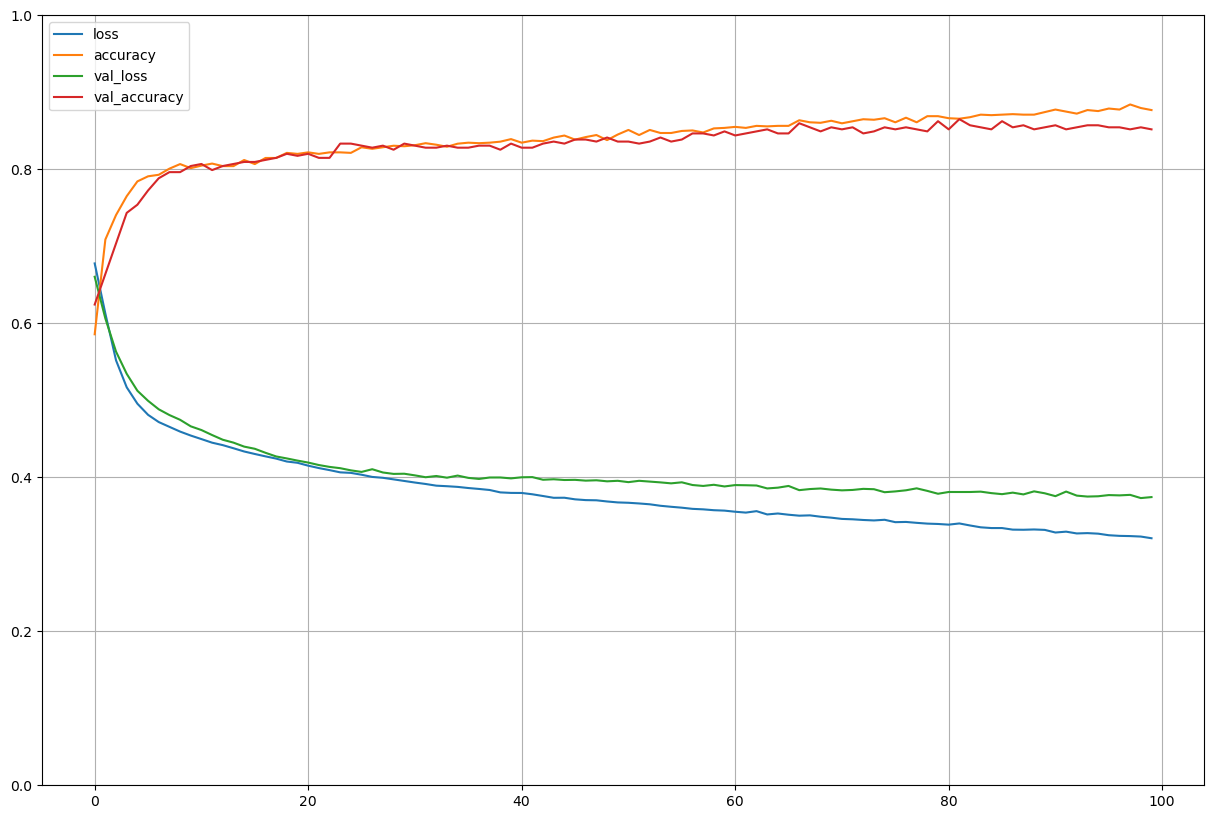

In [348]:
pd.DataFrame(history3.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [296]:
#from tensorflow.keras.models import Sequential

modelK3=keras.Sequential()

modelK3.add(keras.layers.Dense(20, activation="relu"))
modelK3.add(keras.layers.Dense(20, activation="relu"))
modelK3.add(keras.layers.Dense(5, activation="relu"))
modelK3.add(keras.layers.Dropout(0.5))
modelK3.add(keras.layers.Dense(3, activation="relu"))
modelK3.add(keras.layers.Dense(1, activation="sigmoid"))

modelK3.compile(loss="binary_crossentropy", optimizer="adam")

In [344]:

historyK3 = modelK3.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/200
48/48 [==============================] - 0s 3ms/step - loss: 0.4054 - val_loss: 0.4593
Epoch 2/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3941 - val_loss: 0.4521
Epoch 3/200
48/48 [==============================] - 0s 2ms/step - loss: 0.4071 - val_loss: 0.4432
Epoch 4/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3967 - val_loss: 0.4563
Epoch 5/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3905 - val_loss: 0.4565
Epoch 6/200
48/48 [==============================] - 0s 2ms/step - loss: 0.4012 - val_loss: 0.4499
Epoch 7/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3945 - val_loss: 0.4605
Epoch 8/200
48/48 [==============================] - 0s 2ms/step - loss: 0.4018 - val_loss: 0.4658
Epoch 9/200
48/48 [==============================] - 0s 3ms/step - loss: 0.4076 - val_loss: 0.4580
Epoch 10/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3938 - val_loss: 0.4597
Epoch 11/

48/48 [==============================] - 0s 2ms/step - loss: 0.3922 - val_loss: 0.4985
Epoch 84/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3911 - val_loss: 0.4973
Epoch 85/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3919 - val_loss: 0.4969
Epoch 86/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3965 - val_loss: 0.5061
Epoch 87/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3706 - val_loss: 0.5175
Epoch 88/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3979 - val_loss: 0.5046
Epoch 89/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3908 - val_loss: 0.5177
Epoch 90/200
48/48 [==============================] - 0s 2ms/step - loss: 0.4069 - val_loss: 0.5400
Epoch 91/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.5117
Epoch 92/200
48/48 [==============================] - 0s 3ms/step - loss: 0.3859 - val_loss: 0.5114
Epoch 93/200


48/48 [==============================] - 0s 3ms/step - loss: 0.3667 - val_loss: 0.5922
Epoch 165/200
48/48 [==============================] - 0s 3ms/step - loss: 0.3799 - val_loss: 0.5837
Epoch 166/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3749 - val_loss: 0.6028
Epoch 167/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3812 - val_loss: 0.6072
Epoch 168/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3757 - val_loss: 0.5868
Epoch 169/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3736 - val_loss: 0.5892
Epoch 170/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3729 - val_loss: 0.5649
Epoch 171/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3754 - val_loss: 0.5871
Epoch 172/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.5829
Epoch 173/200
48/48 [==============================] - 0s 2ms/step - loss: 0.3805 - val_loss: 0.6115
Epoc

(0.0, 1.0)

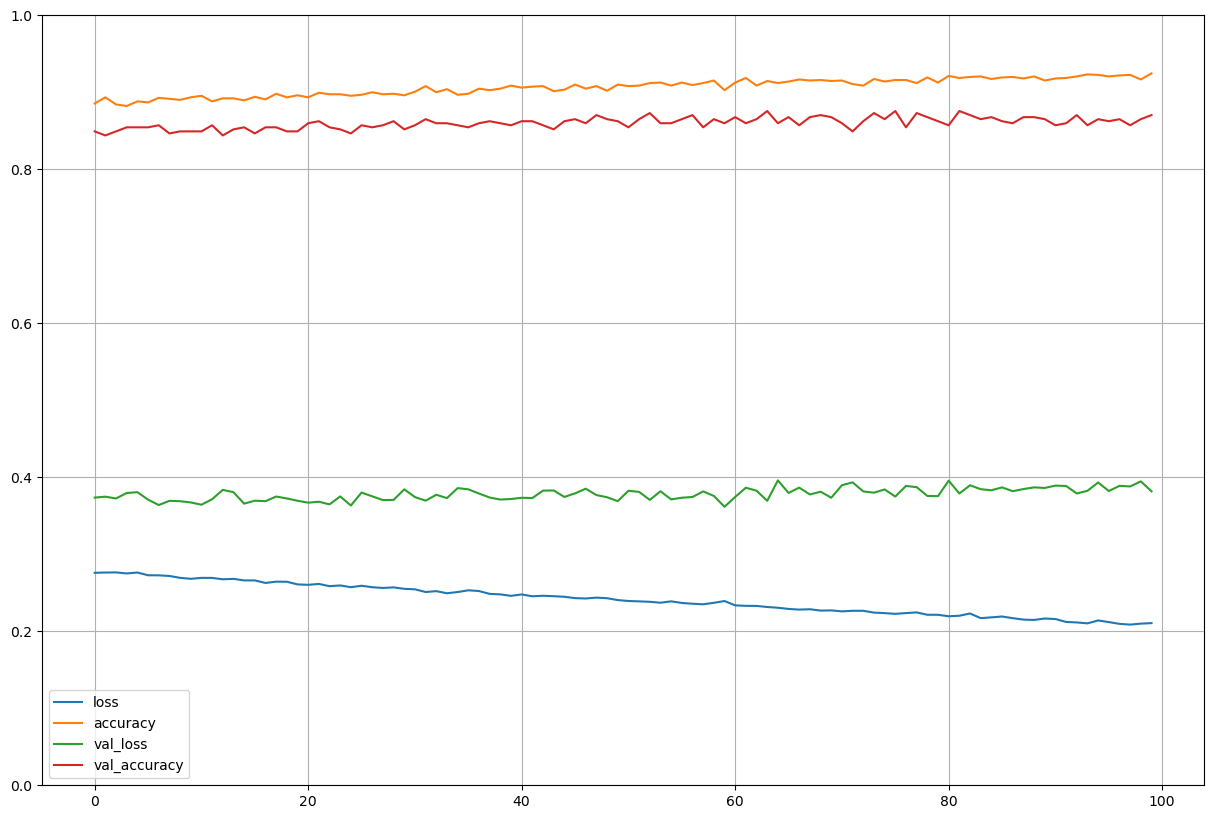

In [345]:
pd.DataFrame(history3.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()